In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

# DBSCAN with Multiple Data Sets

Read [here](https://www.aaai.org/Papers/KDD/1996/KDD96-037.pdf) if math excites you.

## Dataset 1

In [ ]:
d1 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM1.csv")

d1.head()



,x,y
0,1.206087,1.847686
1,0.351919,0.245691
2,1.201688,0.630774
3,0.733710,1.364328
4,1.150745,0.724892


In [ ]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       200 non-null    float64
 1   y       200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [ ]:
d1.shape

(200, 2)

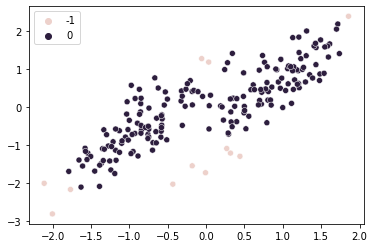

In [ ]:
sns.scatterplot(d1_1[:,0], d1_1[:,1] , hue = labels_DB)

 ## 1. DBSCAN

In [ ]:
d1_1 = d1.copy()
d1_1.head()

,x,y
0,1.206087,1.847686
1,0.351919,0.245691
2,1.201688,0.630774
3,0.733710,1.364328
4,1.150745,0.724892


In [ ]:
# dbscan and plot
scaler = StandardScaler()
d1_1 = scaler.fit_transform(d1_1)
clustering = DBSCAN(eps=0.3, min_samples=15).fit(d1_1)
labels_DB = clustering.labels_


In [ ]:
labels_DB

array([-1, -1,  0, -1,  0,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1,  0,  0,
        1, -1, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0, -1,  0,  0, -1, -1,
       -1, -1, -1, -1, -1,  0,  0, -1,  0, -1, -1, -1, -1, -1,  0,  0,  0,
       -1, -1,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0, -1, -1, -1,  0, -1,
        0,  0, -1,  0,  0, -1, -1,  0,  0,  0, -1, -1, -1,  0,  0,  0, -1,
        0,  0,  0,  0,  0, -1, -1,  0, -1, -1, -1, -1, -1, -1,  0, -1, -1,
       -1, -1, -1, -1,  1, -1, -1,  1, -1, -1,  1,  1, -1,  1,  1, -1,  1,
       -1,  1,  1,  1, -1, -1,  1, -1,  1,  1, -1,  1, -1, -1,  1,  1,  1,
       -1,  1,  1, -1,  1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,  1, -1,
        1, -1, -1,  1,  1, -1, -1, -1, -1,  1, -1,  1, -1, -1,  1, -1,  1,
       -1,  1, -1,  1, -1, -1,  1, -1, -1, -1, -1, -1,  1, -1,  1,  1, -1,
        1, -1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1, -1])

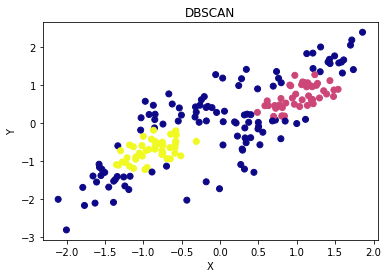

In [ ]:
# grab only clustered data points
plt.scatter(d1_1[:,0] , d1_1[:,1] , c = labels_DB , cmap= "plasma")
plt.title("DBSCAN")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## 2.Hierarchical

In [ ]:
d1_2 = d1.copy()
d1_2.head()

,x,y
0,1.206087,1.847686
1,0.351919,0.245691
2,1.201688,0.630774
3,0.733710,1.364328
4,1.150745,0.724892


In [ ]:
scaler = StandardScaler()
d1_2 = scaler.fit_transform(d1_2)
clustering = AgglomerativeClustering(7).fit(d1_1)
labels_HR = clustering.labels_

In [ ]:
labels_HR

array([3, 5, 0, 0, 0, 0, 3, 0, 3, 0, 3, 3, 5, 0, 0, 0, 0, 1, 4, 3, 0, 4,
       0, 3, 3, 0, 0, 4, 0, 5, 0, 0, 0, 5, 0, 4, 5, 5, 4, 0, 0, 0, 0, 5,
       5, 0, 5, 3, 5, 0, 0, 5, 3, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 3, 5, 3,
       0, 0, 0, 0, 5, 0, 0, 5, 5, 0, 0, 0, 5, 5, 3, 0, 0, 0, 5, 0, 0, 0,
       0, 0, 3, 0, 0, 3, 5, 5, 5, 5, 0, 0, 1, 2, 2, 0, 1, 1, 1, 1, 1, 6,
       1, 0, 6, 6, 2, 6, 6, 2, 6, 1, 6, 1, 1, 1, 2, 6, 2, 6, 1, 2, 1, 2,
       1, 1, 1, 1, 5, 6, 6, 1, 1, 2, 2, 5, 1, 0, 2, 6, 2, 1, 1, 6, 1, 6,
       2, 1, 1, 2, 1, 6, 2, 2, 6, 1, 6, 2, 2, 6, 1, 6, 2, 6, 2, 5, 1, 2,
       6, 1, 2, 2, 2, 1, 1, 2, 6, 6, 0, 1, 1, 2, 1, 6, 1, 0, 6, 1, 6, 2,
       6, 1])

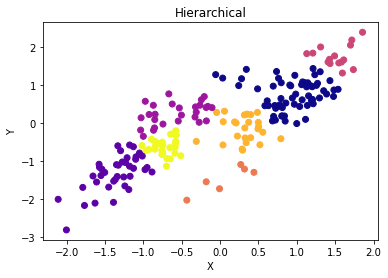

In [ ]:
plt.scatter(d1_2[:, 0] , d1_2[: , 1] , c = labels_HR , cmap= "plasma" )
plt.title("Hierarchical")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## 3. kmeans

In [ ]:
d1_3 = d1.copy()
d1_3.head()

,x,y
0,1.206087,1.847686
1,0.351919,0.245691
2,1.201688,0.630774
3,0.733710,1.364328
4,1.150745,0.724892


In [ ]:
distortion = []
ks = range(1,10)
for i in ks:
    kmean = KMeans(i)
    kmean.fit(d1_3)
    distortion.append(kmean.inertia_)

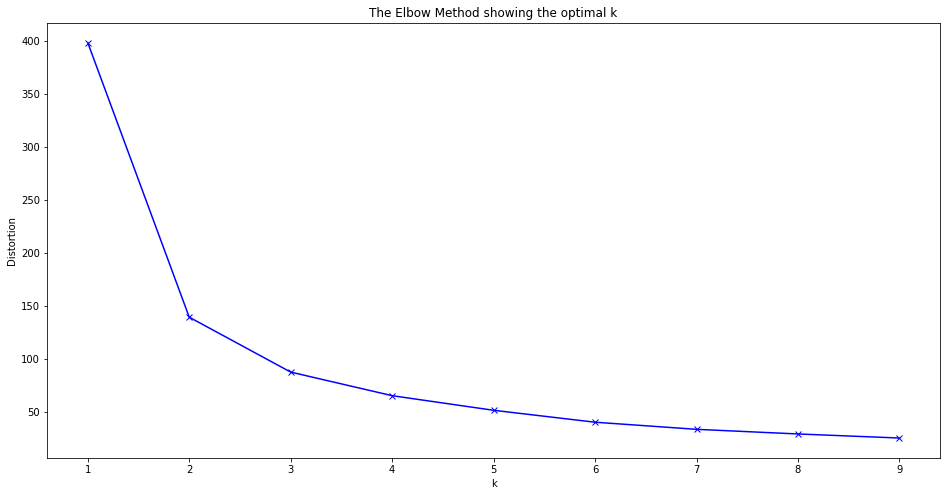

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(ks, distortion, 'bx-') 
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
scaler = StandardScaler()
d1_3 = scaler.fit_transform(d1_3)
k_means = KMeans(n_clusters=3, random_state=0).fit(d1_3)
labels_KM = k_means.labels_

In [ ]:
k_means.cluster_centers_

array([[-1.10772011, -1.12071734],
       [ 1.06272918,  0.99294451],
       [-0.12176349, -0.02937119]])

In [ ]:
labels_KM

array([1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 0, 1, 1, 2,
       1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 0, 1, 1, 1, 1, 2,
       2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2,
       0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 1, 2, 0, 2, 0, 0, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2,
       2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 1, 0, 0, 2, 0, 2, 0, 1, 0, 0, 0, 2,
       0, 0], dtype=int32)

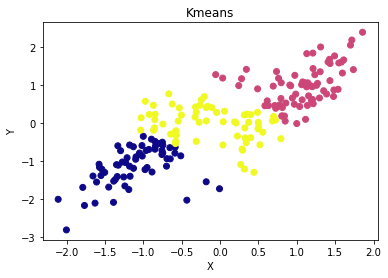

In [ ]:
plt.scatter(d1_3[:, 0] , d1_3[: , 1] , c = labels_KM , cmap= "plasma")
plt.title("Kmeans")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## 4. Gaussian Mixture

In [ ]:
d1_4 = d1.copy()
d1_4.head()

,x,y
0,1.206087,1.847686
1,0.351919,0.245691
2,1.201688,0.630774
3,0.733710,1.364328
4,1.150745,0.724892


In [ ]:
scaler = StandardScaler()
d1_4 = scaler.fit_transform(d1_4)
clustering = GaussianMixture(n_components=3, random_state=0).fit(d1_4)
labels_GM = clustering.predict(d1_4)

In [ ]:
labels_GM

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0,
       2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2])

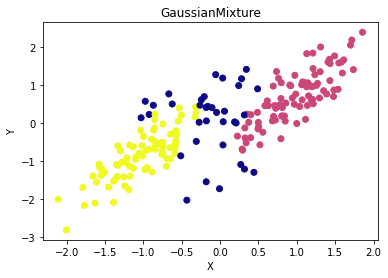

In [ ]:
plt.scatter(d1_4[: , 0] , d1_4[: , 1] , c = labels_GM , cmap = "plasma" )
plt.title("GaussianMixture")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [ ]:
# silhouette_score of DBSCAN
print("silhouette_score of DBSCAN:",silhouette_score(d1_1 , labels_DB))
# silhouette_score of Hierarchical
print("silhouette_score of Hierarchical:",silhouette_score(d1_2 , labels_HR))
# silhouette_score of Kmeans
print("silhouette_score of Kmeans:",silhouette_score(d1_3 , labels_KM))
# silhouette_score of Gaussian Mixture
print("silhouette_score of Gaussian Mixture:",silhouette_score(d1_4 , labels_GM))

silhouette_score of DBSCAN: 0.2519789432361902
silhouette_score of Hierarchical: 0.36243481465000954
silhouette_score of Kmeans: 0.43992489383941363
silhouette_score of Gaussian Mixture: 0.3306975860818548


## The best silhouette_score of clustering is = Kmeans: 0.43992489383941363

## Dataset 2

In [ ]:
d2 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM2.csv")
d2.head()


,x,y
0,1.578527,1.408111
1,1.748206,0.441915
2,1.523151,0.681521
3,1.318949,0.362971
4,0.977164,-0.373589


In [ ]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       300 non-null    float64
 1   y       300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


In [ ]:
d2.shape

(300, 2)

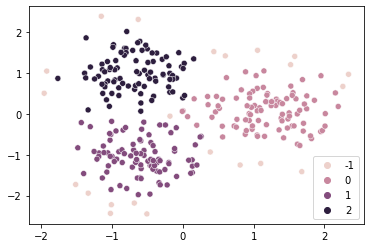

In [ ]:
sns.scatterplot(d2_1[:,0], d2_1[:,1] , hue = labels_DB)

 ## 1. DBSCAN

In [ ]:
d2_1 = d2.copy()
d2_1.head()

,x,y
0,1.578527,1.408111
1,1.748206,0.441915
2,1.523151,0.681521
3,1.318949,0.362971
4,0.977164,-0.373589


In [ ]:
scaler = StandardScaler()
d2_1 = scaler.fit_transform(d2_1)
clustering = DBSCAN(eps=0.5, min_samples=20).fit(d2_1)
labels_DB = clustering.labels_

In [ ]:
labels_DB

array([-1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  2,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  0, -1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,
        2,  2,  2,  2, -1,  0,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
       -1,  2,  2,  2,  2

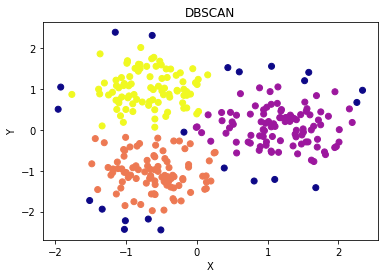

In [ ]:
# grab only clustered data points
plt.scatter(d2_1[:,0] , d2_1[:,1] , c = labels_DB , cmap= "plasma")
plt.title("DBSCAN")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


## 2.Hierarchical

In [ ]:
d2_2 = d2.copy()
d2_2.head()

,x,y
0,1.578527,1.408111
1,1.748206,0.441915
2,1.523151,0.681521
3,1.318949,0.362971
4,0.977164,-0.373589


In [ ]:
scaler = StandardScaler()
d2_2 = scaler.fit_transform(d2_2)
clustering = AgglomerativeClustering(7).fit(d2_2)
labels_HR = clustering.labels_

In [ ]:
labels_HR

array([4, 4, 4, 4, 0, 0, 4, 0, 0, 4, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 4, 0,
       4, 4, 0, 4, 0, 4, 0, 0, 4, 4, 4, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0,
       4, 4, 0, 0, 3, 4, 4, 4, 0, 4, 3, 4, 0, 4, 0, 4, 0, 0, 4, 0, 0, 0,
       0, 0, 4, 0, 4, 4, 0, 4, 4, 4, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0,
       0, 4, 0, 0, 0, 0, 4, 0, 4, 4, 0, 4, 1, 1, 5, 5, 5, 5, 1, 3, 5, 1,
       1, 5, 5, 1, 5, 1, 3, 1, 5, 5, 5, 5, 1, 5, 1, 1, 1, 5, 1, 5, 1, 1,
       1, 5, 1, 3, 1, 1, 5, 1, 5, 1, 1, 1, 1, 3, 0, 3, 1, 1, 1, 5, 5, 1,
       1, 5, 3, 1, 1, 5, 3, 1, 5, 1, 1, 1, 5, 1, 5, 1, 5, 5, 1, 1, 1, 5,
       5, 5, 5, 5, 5, 1, 5, 5, 1, 1, 3, 1, 3, 1, 5, 1, 5, 5, 5, 5, 1, 5,
       5, 1, 2, 3, 2, 6, 2, 2, 6, 2, 2, 0, 6, 6, 6, 6, 2, 2, 6, 2, 6, 2,
       2, 6, 6, 2, 6, 2, 6, 2, 0, 6, 3, 2, 2, 6, 2, 6, 6, 2, 2, 3, 2, 2,
       4, 3, 2, 3, 2, 6, 2, 4, 6, 3, 2, 2, 2, 3, 6, 3, 3, 6, 6, 3, 2, 5,
       6, 6, 2, 6, 3, 6, 2, 2, 6, 6, 2, 2, 3, 6, 2, 2, 2, 3, 6, 5, 2, 2,
       3, 3, 2, 6, 2, 6, 2, 2, 2, 2, 2, 2, 6, 3])

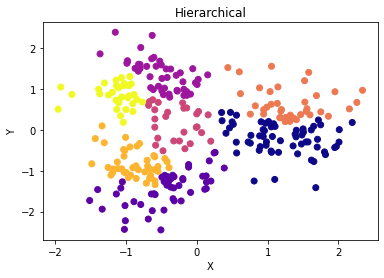

In [ ]:
plt.scatter(d2_2[:, 0] , d2_2[: , 1] , c = labels_HR , cmap= "plasma" )
plt.title("Hierarchical")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## 3. kmeans

In [ ]:
d2_3 = d2.copy()
d2_3.head()

,x,y
0,1.578527,1.408111
1,1.748206,0.441915
2,1.523151,0.681521
3,1.318949,0.362971
4,0.977164,-0.373589


In [ ]:
distortion = []
ks = range(1,10)
for i in ks:
    kmean = KMeans(i)
    kmean.fit(d2_3)
    distortion.append(kmean.inertia_)

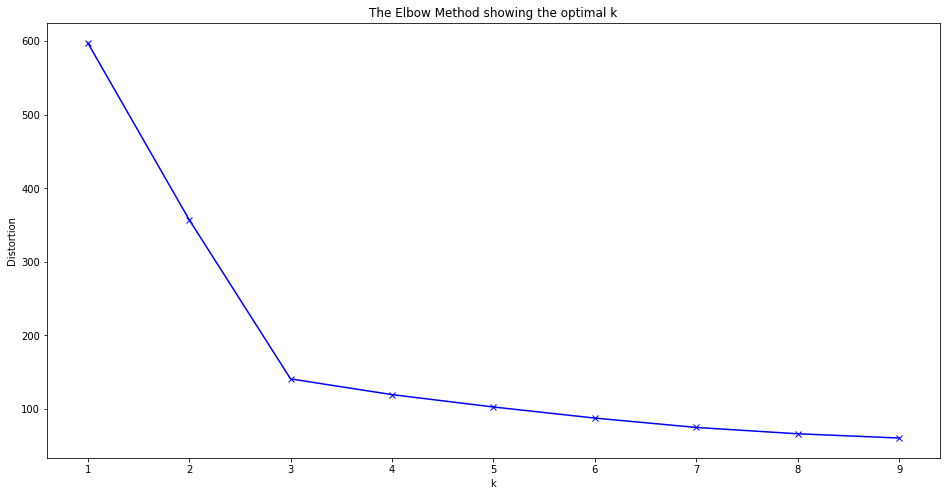

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(ks, distortion, 'bx-') 
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
scaler = StandardScaler()
d2_3 = scaler.fit_transform(d2_3)
k_means = KMeans(n_clusters=4, random_state=0).fit(d2_3)
labels_KM = k_means.labels_

In [ ]:
k_means.cluster_centers_

array([[-0.67281519, -1.17785818],
       [-0.7219794 ,  1.10732371],
       [ 0.13936769, -0.04601384],
       [ 1.37949906,  0.12102065]])

In [ ]:
labels_KM

array([3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2,
       3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2], d

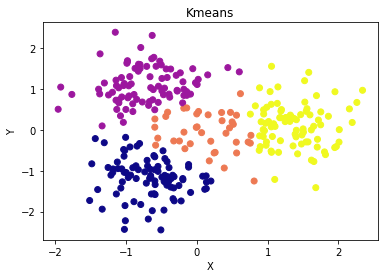

In [ ]:
plt.scatter(d2_3[:, 0] , d2_3[: , 1] , c = labels_KM , cmap= "plasma")
plt.title("Kmeans")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## 4. Gaussian Mixture

In [ ]:
d2_4 = d2.copy()
d2_4.head()

,x,y
0,1.578527,1.408111
1,1.748206,0.441915
2,1.523151,0.681521
3,1.318949,0.362971
4,0.977164,-0.373589


In [ ]:
scaler = StandardScaler()
d2_4 = scaler.fit_transform(d2_4)
clustering = GaussianMixture(n_components=3, random_state=0).fit(d2_4)
labels_GM = clustering.predict(d2_4)

In [ ]:
labels_GM

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

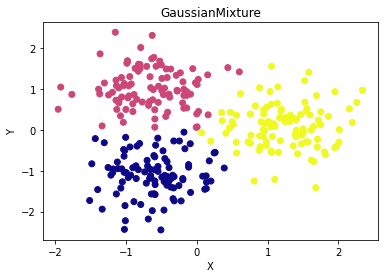

In [ ]:
plt.scatter(d2_4[: , 0] , d2_4[: , 1] , c = labels_GM , cmap = "plasma" )
plt.title("GaussianMixture")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [ ]:
# silhouette_score of DBSCAN
print("silhouette_score of DBSCAN:",silhouette_score(d2_1 , labels_DB))
# silhouette_score of Hierarchical
print("silhouette_score of Hierarchical:",silhouette_score(d2_2 , labels_HR))
# silhouette_score of Kmeans
print("silhouette_score of Kmeans:",silhouette_score(d2_3 , labels_KM))
# silhouette_score of Gaussian Mixture
print("silhouette_score of Gaussian Mixture:",silhouette_score(d2_4 , labels_GM))

silhouette_score of DBSCAN: 0.5046888254692767
silhouette_score of Hierarchical: 0.2934145744548888
silhouette_score of Kmeans: 0.4351777314825939
silhouette_score of Gaussian Mixture: 0.558315766313531


## Dataset 3

In [ ]:
d3 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM3.csv")
d3.head()


,x,y
0,1.332228,0.178299
1,1.256056,0.146765
2,1.477661,0.155054
3,1.384840,0.022054
4,1.526956,0.267920


In [ ]:
d3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       300 non-null    float64
 1   y       300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


In [ ]:
d3.shape 

(300, 2)

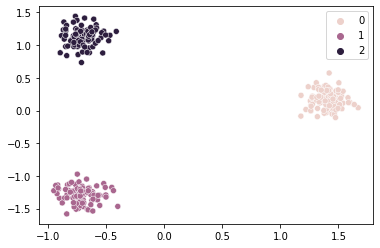

In [ ]:
sns.scatterplot(d3_1[:,0], d3_1[:,1] , hue = labels_DB)

 ## 1. DBSCAN

In [ ]:
d3_1 = d3.copy()
d3_1.head()

,x,y
0,1.332228,0.178299
1,1.256056,0.146765
2,1.477661,0.155054
3,1.384840,0.022054
4,1.526956,0.267920


In [ ]:
scaler = StandardScaler()
d3_1 = scaler.fit_transform(d3_1)
clustering = DBSCAN(eps=0.3, min_samples=10).fit(d3_1)
labels_DB = clustering.labels_

In [ ]:
labels_DB

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

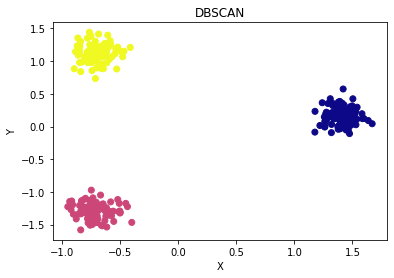

In [ ]:
# grab only clustered data points
plt.scatter(d3_1[:,0] , d3_1[:,1] , c = labels_DB , cmap= "plasma")
plt.title("DBSCAN")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## 2.Hierarchical

In [ ]:
d3_2 = d3.copy()
d3_2.head()

,x,y
0,1.332228,0.178299
1,1.256056,0.146765
2,1.477661,0.155054
3,1.384840,0.022054
4,1.526956,0.267920


In [ ]:
scaler = StandardScaler()
d3_2 = scaler.fit_transform(d3_2)
clustering = AgglomerativeClustering(3).fit(d3_2)
labels_HR = clustering.labels_

In [ ]:
labels_HR

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

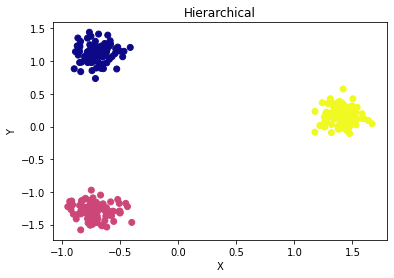

In [ ]:
plt.scatter(d3_2[:, 0] , d3_2[: , 1] , c = labels_HR , cmap= "plasma" )
plt.title("Hierarchical")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## 3. kmeans

In [ ]:
d3_3 = d3.copy()
d3_3.head()

,x,y
0,1.332228,0.178299
1,1.256056,0.146765
2,1.477661,0.155054
3,1.384840,0.022054
4,1.526956,0.267920


In [ ]:
distortion = []
ks = range(1,10)
for i in ks:
    kmean = KMeans(i)
    kmean.fit(d3_3)
    distortion.append(kmean.inertia_)

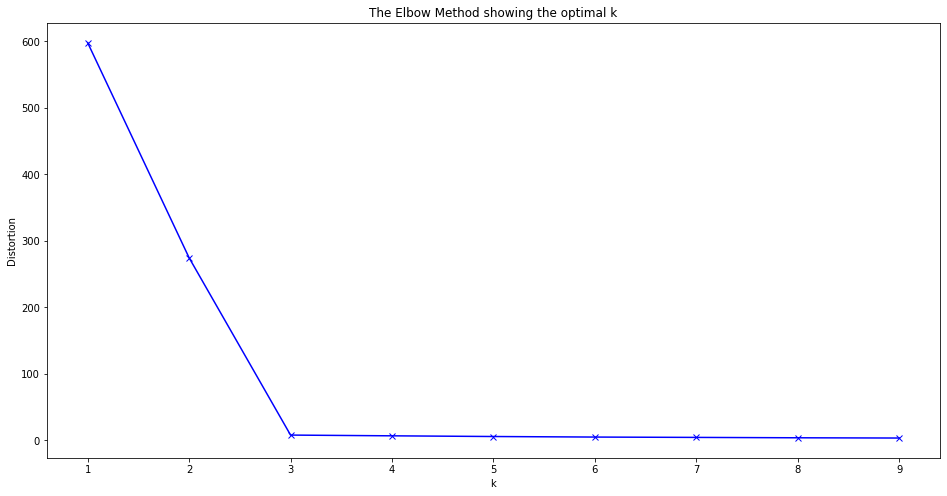

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(ks, distortion, 'bx-') 
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
scaler = StandardScaler()
d3_3 = scaler.fit_transform(d3_3)
k_means = KMeans(n_clusters=3, random_state=0).fit(d3_3)
labels_KM = k_means.labels_

In [ ]:
k_means.cluster_centers_

array([[-0.71092546, -1.28797469],
       [-0.69591467,  1.12612546],
       [ 1.40684013,  0.16184923]])

In [ ]:
labels_KM

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

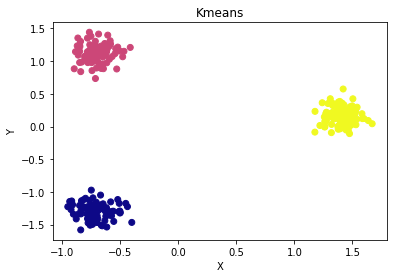

In [ ]:
plt.scatter(d3_3[:, 0] , d3_3[: , 1] , c = labels_KM , cmap= "plasma")
plt.title("Kmeans")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## 4. Gaussian Mixture

In [ ]:
d3_4 = d3.copy()
d3_4.head()

,x,y
0,1.332228,0.178299
1,1.256056,0.146765
2,1.477661,0.155054
3,1.384840,0.022054
4,1.526956,0.267920


In [ ]:
scaler = StandardScaler()
d3_4 = scaler.fit_transform(d3_4)
clustering = GaussianMixture(n_components=3, random_state=0).fit(d3_4)
labels_GM = clustering.predict(d3_4)

In [ ]:
labels_GM

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

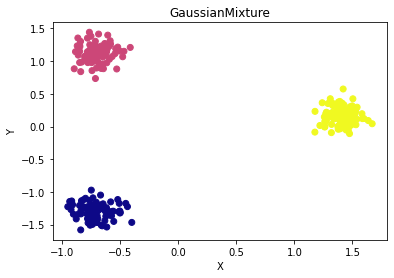

In [ ]:
plt.scatter(d3_4[: , 0] , d3_4[: , 1] , c = labels_GM , cmap = "plasma" )
plt.title("GaussianMixture")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [ ]:
# silhouette_score of DBSCAN
print("silhouette_score of DBSCAN:",silhouette_score(d3_1 , labels_DB))
# silhouette_score of Hierarchical
print("silhouette_score of Hierarchical:",silhouette_score(d3_2 , labels_HR))
# silhouette_score of Kmeans
print("silhouette_score of Kmeans:",silhouette_score(d3_3 , labels_KM))
# silhouette_score of Gaussian Mixture
print("silhouette_score of Gaussian Mixture:",silhouette_score(d3_4 , labels_GM))

silhouette_score of DBSCAN: 0.913619050733588
silhouette_score of Hierarchical: 0.913619050733588
silhouette_score of Kmeans: 0.913619050733588
silhouette_score of Gaussian Mixture: 0.913619050733588


## Dataset 4

In [ ]:
d4 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM4.csv")
d4.head()

,x,y
0,-0.006848,0.395527
1,0.314820,-0.289261
2,0.171705,1.078077
3,-1.203661,1.325926
4,-0.179379,-0.036615


In [ ]:
d4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       600 non-null    float64
 1   y       600 non-null    float64
dtypes: float64(2)
memory usage: 9.5 KB


In [ ]:
d4.shape

(600, 2)

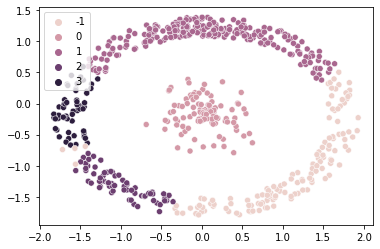

In [ ]:
sns.scatterplot(d4_1[:,0], d4_1[:,1] , hue = labels_DB)

 ## 1. DBSCAN

In [ ]:
d4_1 = d4.copy()
d4_1.head()

,x,y
0,-0.006848,0.395527
1,0.314820,-0.289261
2,0.171705,1.078077
3,-1.203661,1.325926
4,-0.179379,-0.036615


In [ ]:
scaler = StandardScaler()
d4_1 = scaler.fit_transform(d4_1)
clustering = DBSCAN(eps=0.5, min_samples=50).fit(d4_1)
labels_DB = clustering.labels_

In [ ]:
labels_DB

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
        3,  3,  1,  1,  1,  1,  2,  1,  1,  1,  2,  3,  2, -1,  1,  1, -1,
       -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  2, -1,  1,  2, -1,  1,  1,
        2,  1,  1,  1,  1,  1,  3, -1, -1,  3,  1,  1,  1,  1, -1,  1,  1,
        1,  3, -1, -1, -1,  1,  2,  1,  3,  1,  1, -1,  1,  1,  2, -1,  1,
       -1,  3,  3,  2,  3, -1, -1, -1,  1, -1,  3,  1, -1, -1,  1,  3,  1,
        3,  1,  1,  3,  1, -1,  3,  1,  1,  1,  1, -1,  3,  1,  1, -1,  2,
        1,  1, -1,  1,  3,  2, -1, -1,  2,  3,  1,  1, -1,  2,  1,  1,  3,
        2,  1, -1,  1,  1

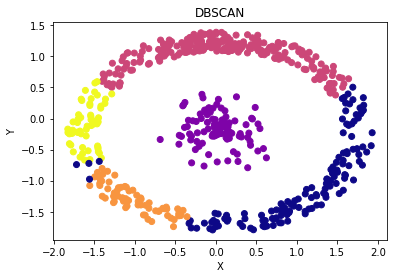

In [ ]:
# grab only clustered data points
plt.scatter(d4_1[:,0] , d4_1[:,1] , c = labels_DB , cmap= "plasma")
plt.title("DBSCAN")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## 2.Hierarchical

In [ ]:
d4_2 = d4.copy()
d4_2.head()

,x,y
0,-0.006848,0.395527
1,0.314820,-0.289261
2,0.171705,1.078077
3,-1.203661,1.325926
4,-0.179379,-0.036615


In [ ]:
scaler = StandardScaler()
d4_2 = scaler.fit_transform(d4_2)
clustering = AgglomerativeClustering(7).fit(d4_2)
labels_HR = clustering.labels_

In [ ]:
labels_HR

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 0, 0, 4, 4, 2, 0, 3, 2,
       4, 4, 3, 0, 3, 1, 4, 4, 1, 1, 4, 2, 1, 6, 0, 4, 4, 4, 2, 3, 2, 0,
       3, 2, 4, 6, 3, 4, 4, 0, 2, 4, 0, 1, 1, 0, 0, 2, 4, 6, 1, 4, 0, 4,
       0, 1, 2, 1, 6, 3, 0, 0, 4, 6, 3, 4, 4, 3, 3, 6, 1, 0, 0, 3, 0, 2,
       3, 1, 2, 1, 0, 4, 2, 1, 4, 0, 4, 0, 2, 4, 0, 0, 3, 0, 4, 4, 0, 0,
       1, 0, 4, 2, 2, 3, 2, 6, 1, 4, 0, 3, 2, 3, 3, 0, 4, 6, 1, 3, 4, 0,
       0, 3, 6, 1, 2, 4, 2, 2, 4, 6, 6, 3, 6, 3, 4, 4, 0, 0, 2, 6, 6, 3,
       4, 3, 6, 4, 0, 2, 4, 1, 3, 3, 4, 0, 0, 4, 2, 4, 1, 3, 6, 0, 1, 3,
       4, 3, 0, 2, 1, 3, 3, 1, 2, 4, 1, 1, 0, 1, 0, 1, 2, 1, 0, 4, 4, 3,
       2, 6, 1, 0, 0, 1, 3, 2, 1, 1, 0, 0, 1, 1, 0,

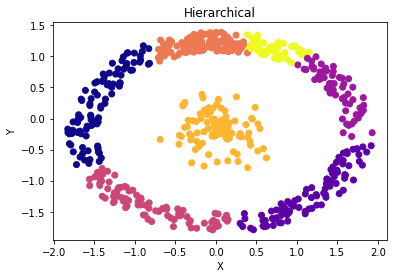

In [ ]:
plt.scatter(d4_2[:, 0] , d4_2[: , 1] , c = labels_HR , cmap= "plasma" )
plt.title("Hierarchical")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## 3. kmeans

In [ ]:
d4_3 = d4.copy()
d4_3.head()

,x,y
0,-0.006848,0.395527
1,0.314820,-0.289261
2,0.171705,1.078077
3,-1.203661,1.325926
4,-0.179379,-0.036615


In [ ]:
distortion = []
ks = range(1,10)
for i in ks:
    kmean = KMeans(i)
    kmean.fit(d4_3)
    distortion.append(kmean.inertia_)

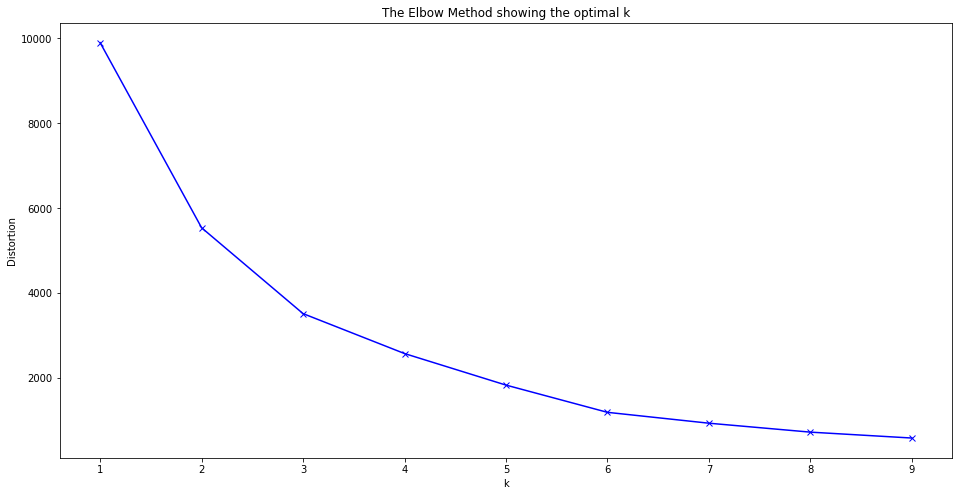

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(ks, distortion, 'bx-') 
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
scaler = StandardScaler()
d4_3 = scaler.fit_transform(d4_3)
k_means = KMeans(n_clusters=5, random_state=0).fit(d4_3)
labels_KM = k_means.labels_

In [ ]:
k_means.cluster_centers_

array([[-1.25687944, -0.80244486],
       [ 1.17383807,  0.73033943],
       [ 0.01830709, -0.16775384],
       [-0.38720764,  1.08200165],
       [ 0.98670778, -1.26342412]])

In [ ]:
labels_KM

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 0, 0, 3, 3, 1, 3, 0, 1,
       3, 3, 0, 0, 0, 4, 3, 3, 4, 4, 3, 1, 4, 3, 3, 3, 3, 3, 1, 0, 1, 3,
       0, 1, 3, 1, 0, 3, 3, 3, 1, 3, 0, 4, 4, 0, 3, 1, 3, 1, 4, 3, 3, 3,
       0, 4, 1, 4, 1, 0, 3, 0, 3, 1, 4, 3, 3, 0, 4, 1, 4, 0, 0, 0, 0, 1,
       4, 4, 1, 4, 0, 3, 1, 4, 3, 0, 3, 0, 1, 3, 0, 3, 0, 0, 3, 3, 3, 3,
       4, 0, 3, 1, 1, 0, 1, 1, 4, 3, 0, 0, 1, 4, 0, 0, 3, 1, 4, 0, 3, 3,
       0, 0, 1, 4, 1, 3, 1, 1, 3, 1, 1, 0, 1, 0, 3, 3, 0, 0, 1, 1, 1, 4,
       3, 0, 1, 3, 3, 1, 3, 4, 0, 0, 3, 3, 0, 3, 1, 3, 4, 0, 1, 3, 4, 4,
       3, 0, 3, 1, 4, 4, 0, 4, 1, 3, 4, 4, 3, 4, 0, 4, 1, 4, 3, 3, 3, 0,
       1, 3, 4, 0, 0, 4, 4, 1, 4, 4, 0, 0, 4, 4, 0,

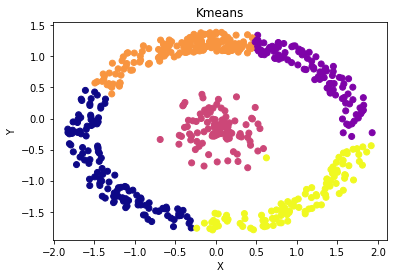

In [ ]:
plt.scatter(d4_3[:, 0] , d4_3[: , 1] , c = labels_KM , cmap= "plasma")
plt.title("Kmeans")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## 4. Gaussian Mixture

In [ ]:
d4_4 = d4.copy()
d4_4.head()

,x,y
0,-0.006848,0.395527
1,0.314820,-0.289261
2,0.171705,1.078077
3,-1.203661,1.325926
4,-0.179379,-0.036615


In [ ]:
scaler = StandardScaler()
d4_4 = scaler.fit_transform(d4_4)
clustering = GaussianMixture(n_components=5, random_state=0).fit(d4_4)
labels_GM = clustering.predict(d4_4)

In [ ]:
labels_GM

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 4, 4, 0, 2, 1, 0,
       0, 4, 1, 2, 1, 3, 4, 4, 3, 3, 4, 0, 3, 0, 2, 4, 4, 4, 0, 1, 0, 2,
       1, 0, 4, 0, 1, 4, 4, 2, 0, 4, 2, 3, 3, 2, 2, 0, 4, 0, 3, 4, 2, 4,
       2, 3, 0, 3, 0, 1, 2, 2, 4, 0, 1, 4, 4, 1, 1, 0, 4, 2, 2, 1, 2, 0,
       1, 3, 0, 3, 2, 4, 0, 3, 4, 2, 4, 2, 0, 4, 2, 2, 1, 2, 4, 0, 2, 2,
       3, 2, 4, 0, 0, 1, 0, 0, 3, 4, 2, 1, 0, 1, 1, 2, 4, 0, 3, 1, 4, 2,
       2, 1, 0, 3, 0, 4, 0, 3, 4, 0, 0, 1, 0, 1, 4, 4, 2, 2, 0, 0, 0, 1,
       4, 1, 0, 4, 2, 0, 4, 1, 1, 1, 4, 2, 2, 4, 0, 4, 3, 1, 0, 2, 3, 1,
       4, 1, 4, 0, 3, 1, 1, 3, 0, 0, 3, 3, 2, 3, 2, 3, 0, 3, 2, 4, 4, 1,
       3, 0, 3, 2, 2, 3, 1, 0, 3, 3, 2, 2, 3, 3, 2,

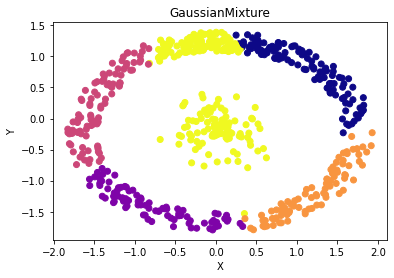

In [ ]:
plt.scatter(d4_4[: , 0] , d4_4[: , 1] , c = labels_GM , cmap = "plasma" )
plt.title("GaussianMixture")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [ ]:
# silhouette_score of DBSCAN
print("silhouette_score of DBSCAN:",silhouette_score(d4_1 , labels_DB))
# silhouette_score of Hierarchical
print("silhouette_score of Hierarchical:",silhouette_score(d4_2 , labels_HR))
# silhouette_score of Kmeans
print("silhouette_score of Kmeans:",silhouette_score(d4_3 , labels_KM))
# silhouette_score of Gaussian Mixture
print("silhouette_score of Gaussian Mixture:",silhouette_score(d4_4 , labels_GM))

silhouette_score of DBSCAN: 0.40903400682084695
silhouette_score of Hierarchical: 0.509841677814739
silhouette_score of Kmeans: 0.4934707759089491
silhouette_score of Gaussian Mixture: 0.4146588483086495


### Compare

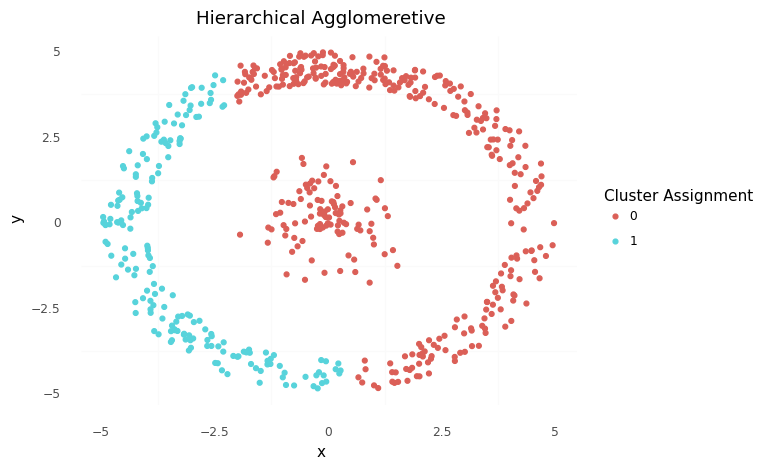

<ggplot: (8758397509309)>


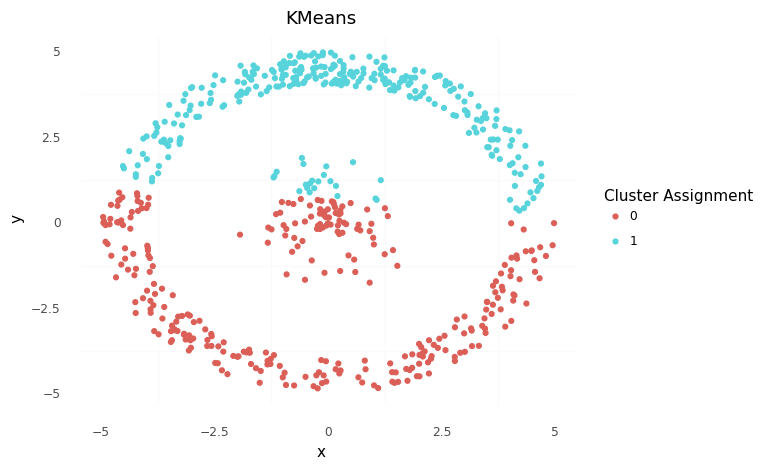

<ggplot: (8758397882049)>


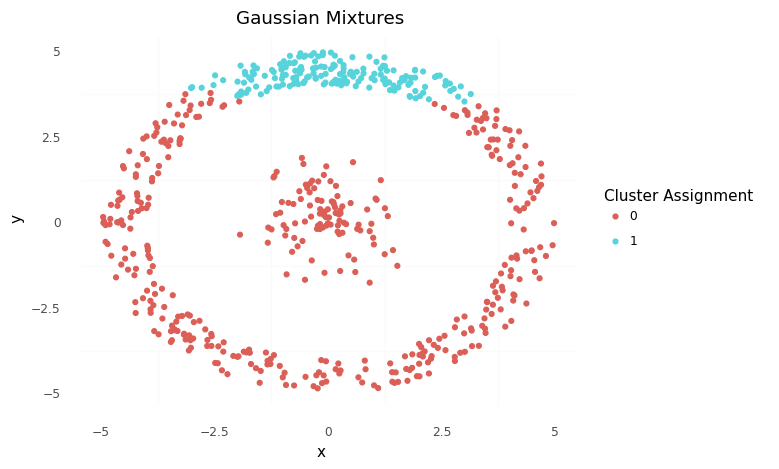

<ggplot: (8758397646573)>


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

hac = AgglomerativeClustering(2)
km = KMeans(2)
gm = GaussianMixture(2)

hac.fit(d4)
km.fit(d4)
gm.fit(d4)

d4["hac"] = hac.labels_
d4["km"] = km.labels_
d4["gm"] = gm.predict(d4[["x","y"]])


print(ggplot(d4, aes(x = "x", y = "y",
                    color = "factor(hac)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Hierarchical Agglomeretive"))


print(ggplot(d4, aes(x = "x", y = "y",
                    color = "factor(km)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "KMeans"))


print(ggplot(d4, aes(x = "x", y = "y",
                    color = "factor(gm)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Gaussian Mixtures"))

## Dataset 5

In [ ]:
d5 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM5.csv")

d5.head()


,x,y
0,2.852449,-0.324568
1,2.346342,-0.729224
2,2.229033,-0.599340
3,2.458669,-0.385467
4,2.844177,-0.196813


In [ ]:
d5.shape

(450, 2)

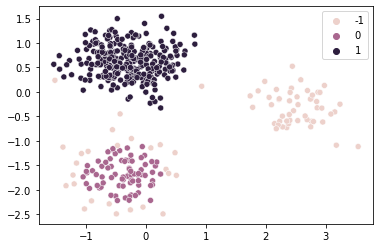

In [ ]:
sns.scatterplot(d5_1[:,0], d5_1[:,1] , hue = labels)

 ## 1. DBSCAN

In [ ]:
d5_1 = d5.copy()
d5_1.head()

,x,y
0,2.852449,-0.324568
1,2.346342,-0.729224
2,2.229033,-0.599340
3,2.458669,-0.385467
4,2.844177,-0.196813


In [ ]:
scaler = StandardScaler()
d5_1 = scaler.fit_transform(d5_1)
clustering = DBSCAN(eps=0.5, min_samples=50).fit(d5_1)
labels_DB = clustering.labels_

In [ ]:
labels_DB

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
       -1,  0,  0,  0,  0,  0, -1, -1, -1,  0,  0,  0,  0,  0,  0, -1,  0,
        0, -1,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0, -1,
        0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0,
        0, -1, -1,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

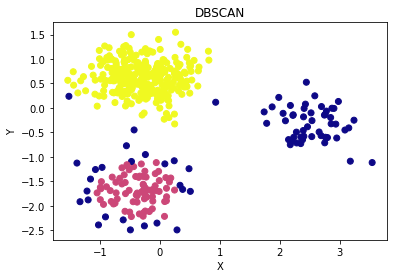

In [ ]:
# grab only clustered data points
plt.scatter(d5_1[:, 0] , d5_1[: , 1] , c = labels_DB , cmap= "plasma")
plt.title("DBSCAN")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


## 2.Hierarchical

In [ ]:
d5_2 = d5.copy()
d5_2.head()

,x,y
0,2.852449,-0.324568
1,2.346342,-0.729224
2,2.229033,-0.599340
3,2.458669,-0.385467
4,2.844177,-0.196813


In [ ]:
scaler = StandardScaler()
d5_2 = scaler.fit_transform(d5_2)
clustering = AgglomerativeClustering(3).fit(d5_2)
labels_HR = clustering.labels_

In [ ]:
labels_HR

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

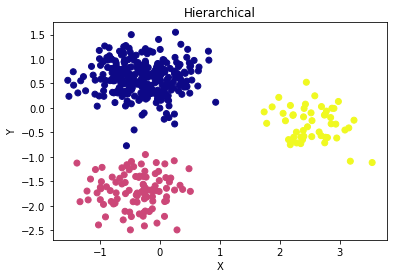

In [ ]:
plt.scatter(d5_2[:, 0] , d5_2[: , 1] , c = labels_HR , cmap= "plasma" )
plt.title("Hierarchical")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## 3. kmeans

In [ ]:
d5_3 = d5.copy()
d5_3.head()

,x,y
0,2.852449,-0.324568
1,2.346342,-0.729224
2,2.229033,-0.599340
3,2.458669,-0.385467
4,2.844177,-0.196813


In [ ]:
distortion = []
ks = range(1,10)
for i in ks:
    kmean = KMeans(i)
    kmean.fit(d5_3)
    distortion.append(kmean.inertia_)

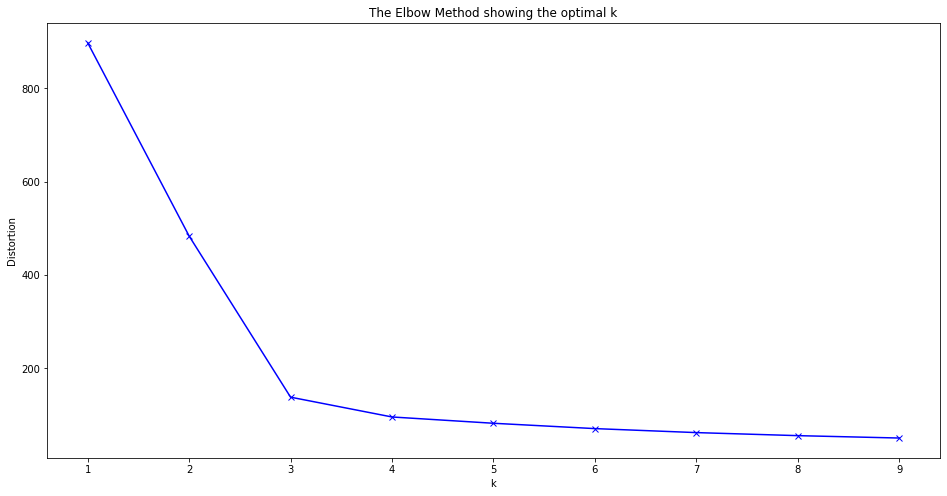

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(ks, distortion, 'bx-') 
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
scaler = StandardScaler()
d5_3 = scaler.fit_transform(d5_3)
k_means = KMeans(n_clusters=3, random_state=0).fit(d5_3)
labels_KM = k_means.labels_

In [ ]:
k_means.cluster_centers_

array([[-0.29155169,  0.613361  ],
       [-0.39292484, -1.67660405],
       [ 2.53515982, -0.32695792]])

In [ ]:
labels_KM

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

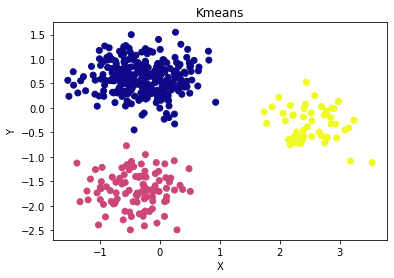

In [ ]:
plt.scatter(d5_3[:, 0] , d5_3[: , 1] , c = labels_KM , cmap= "plasma")
plt.title("Kmeans")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## 4. Gaussian Mixture

In [ ]:
d5_4 = d5.copy()
d5_4.head()

,x,y
0,2.852449,-0.324568
1,2.346342,-0.729224
2,2.229033,-0.599340
3,2.458669,-0.385467
4,2.844177,-0.196813


In [ ]:
scaler = StandardScaler()
d5_4 = scaler.fit_transform(d5_4)
clustering = GaussianMixture(n_components=3, random_state=0).fit(d5_4)
labels_GM = clustering.predict(d5_4)

In [ ]:
labels_GM

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

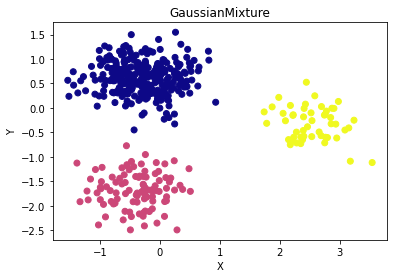

In [ ]:
plt.scatter(d5_4[: , 0] , d5_4[: , 1] , c = labels_GM , cmap = "plasma" )
plt.title("GaussianMixture")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [ ]:
# silhouette_score of DBSCAN
print("silhouette_score of DBSCAN:",silhouette_score(d5_1 , labels_DB))
# silhouette_score of Hierarchical
print("silhouette_score of Hierarchical:",silhouette_score(d5_2 , labels_HR))
# silhouette_score of Kmeans
print("silhouette_score of Kmeans:",silhouette_score(d5_3 , labels_KM))
# silhouette_score of Gaussian Mixture
print("silhouette_score of Gaussian Mixture:",silhouette_score(d5_4 , labels_GM))

silhouette_score of DBSCAN: 0.6076097653513014
silhouette_score of Hierarchical: 0.7031189213721806
silhouette_score of Kmeans: 0.7043537508086658
silhouette_score of Gaussian Mixture: 0.7043537508086658


# Elbow Method

Read more [here](https://iopscience.iop.org/article/10.1088/1755-1315/31/1/012012/pdf) if math excites you.

## Dataset 6

In [ ]:
d6 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM6.csv")
d6.head()

,x,y
0,0.712520,0.653491
1,0.910914,0.068242
2,0.750752,0.526512
3,0.666605,0.584747
4,0.403062,0.956459


In [ ]:
d6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       300 non-null    float64
 1   y       300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


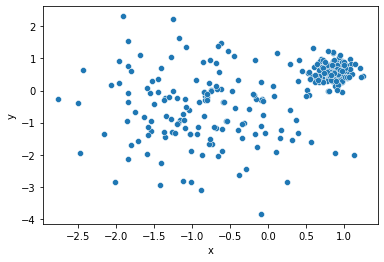

In [ ]:
sns.scatterplot(data = d6 , x = 'x', y= 'y' )

 ## 1. Kmeans

In [ ]:
d6_4 = d6.copy()
d6_4.head()

,x,y
0,0.712520,0.653491
1,0.910914,0.068242
2,0.750752,0.526512
3,0.666605,0.584747
4,0.403062,0.956459


In [ ]:
scaler = StandardScaler()
d6_4 = scaler.fit_transform(d6_4)
k_means = KMeans(n_clusters=3, random_state=0).fit(d6_4)
labels = k_means.labels_

In [ ]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1,
       0, 2, 0, 2, 2, 1, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 1, 1,
       2, 0, 2, 2, 2, 1, 0, 1, 2, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 2, 0, 2, 1, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0,
       2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 1, 0, 2, 1, 0, 0, 2, 0,
       0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2,
       0, 1, 1, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0], d

In [ ]:
k_means.cluster_centers_

array([[-0.79797104, -1.55022185],
       [ 0.79467722,  0.5629244 ],
       [-1.09961811,  0.25013213]])

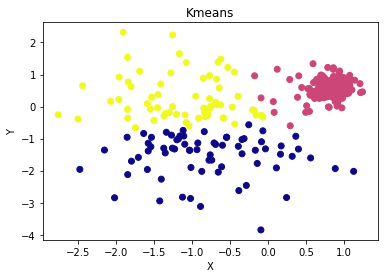

In [ ]:
plt.scatter(d6_4[:, 0] , d6_4[: , 1] , c = labels , cmap= "plasma")
plt.title("Kmeans")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [ ]:
distortion = []
ks = range(1,10)
for i in ks:
    kmean = KMeans(i)
    kmean.fit(d6)
    distortion.append(kmean.inertia_)

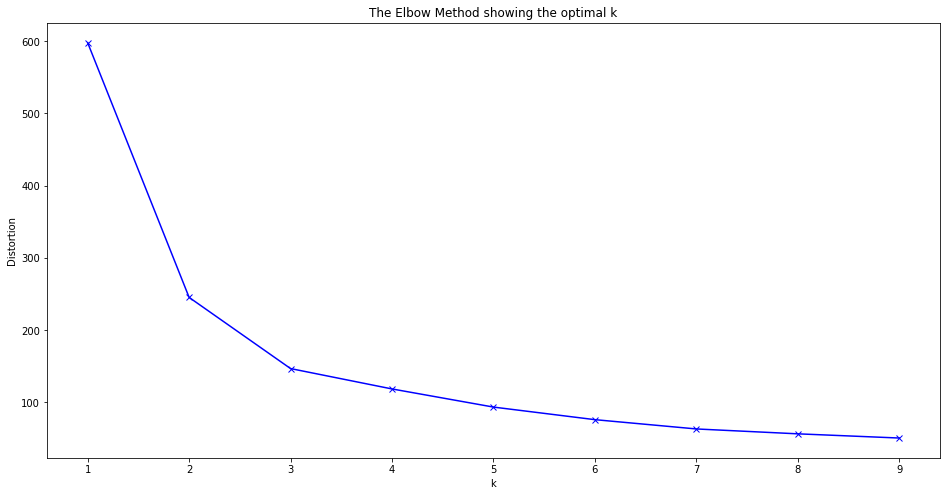

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(ks, distortion, 'bx-') 
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
# using 3 no.of clusting 
silhouette_score(d6_4 , labels) 

0.5861497443577425

In [ ]:
# using 4 no.of clusting 
silhouette_score(d6_4 , labels) 

0.5689937277699338

## 2. Hierarchical

In [ ]:
d6_1 = d6.copy()
d6_1.head()

,x,y
0,0.712520,0.653491
1,0.910914,0.068242
2,0.750752,0.526512
3,0.666605,0.584747
4,0.403062,0.956459


In [ ]:
scaler = StandardScaler()
d6_1 = scaler.fit_transform(d6_1)
clustering = AgglomerativeClustering(7).fit(d6_1)
labels = clustering.labels_

In [ ]:
labels

array([3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 2, 4, 0,
       1, 4, 2, 0, 0, 3, 4, 4, 4, 5, 1, 1, 2, 5, 2, 6, 4, 4, 1, 1, 3, 3,
       0, 1, 0, 0, 4, 4, 2, 3, 5, 1, 5, 2, 0, 1, 6, 2, 4, 5, 2, 4, 4, 2,
       2, 1, 5, 1, 1, 5, 1, 4, 3, 5, 4, 1, 2, 2, 4, 6, 4, 2, 5, 0, 4, 2,
       5, 6, 1, 1, 6, 0, 5, 0, 1, 4, 0, 1, 5, 4, 3, 4, 1, 1, 2, 1, 2, 2,
       4, 4, 2, 1, 4, 5, 1, 2, 0, 5, 1, 0, 1, 0, 4, 2, 4, 0, 2, 2, 5, 6,
       2, 1, 4, 1, 6, 2, 1, 5, 1, 2, 0, 6, 0, 4, 2, 1, 2, 5, 4, 2, 0, 4,
       1, 0, 4, 1, 5, 0, 1, 1, 4, 0, 1, 4, 0, 4])

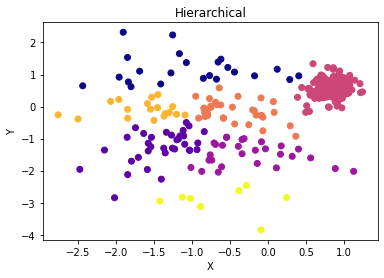

In [ ]:
plt.scatter(d6_1[:, 0] , d6_1[: , 1] , c = labels , cmap= "plasma" )
plt.title("Hierarchical")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [ ]:
silhouette_score(d6_1 , labels)

0.5426568087720224

## 3. DBSCAN

In [ ]:
d6_2 = d6.copy()
d6_2.head()

,x,y
0,0.712520,0.653491
1,0.910914,0.068242
2,0.750752,0.526512
3,0.666605,0.584747
4,0.403062,0.956459


In [ ]:
scaler = StandardScaler()
d6_2 = scaler.fit_transform(d6_2)
clustering = DBSCAN(eps=0.5, min_samples=15).fit(d6_2)
labels = clustering.labels_

In [ ]:
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,
        0,  1,  1, -1, -1, -1,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  0,  0, -1,  1, -1, -1,  1,  0, -1,  0, -1,  1,  1,
        1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1, -1, -1,  1, -1,  1,  1,
        1,  1,  0, -1,  1, -1, -1,  1,  1, -1,  1, -1,  1, -1,  1,  1, -1,
       -1,  1,  1, -1, -1

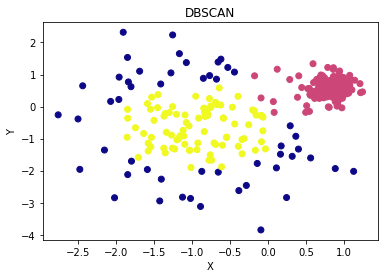

In [ ]:
plt.scatter(d6_2[:, 0] , d6_2[: , 1] , c = labels , cmap= "plasma" )
plt.title("DBSCAN")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [ ]:
silhouette_score(d6_2 , labels)

0.523629650344957

## 4. GaussianMixture

In [ ]:
d6_3 = d6.copy()
d6_3.head()

,x,y
0,0.712520,0.653491
1,0.910914,0.068242
2,0.750752,0.526512
3,0.666605,0.584747
4,0.403062,0.956459


In [ ]:
scaler = StandardScaler()
d6_3 = scaler.fit_transform(d6_3)
clustering = GaussianMixture(n_components=3, random_state=0).fit(d6_3)
labels = clustering.predict(d6_3)

In [ ]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 2,
       0, 2, 0, 2, 2, 1, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 1,
       2, 0, 2, 2, 2, 2, 0, 1, 2, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0,
       0, 0, 2, 0, 0, 2, 0, 2, 1, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0,
       2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2,
       0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0])

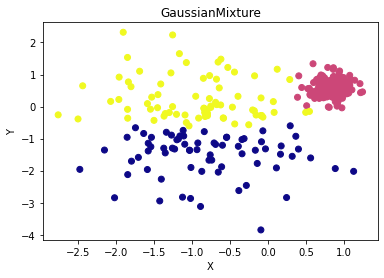

In [ ]:
plt.scatter(d6_3[: , 0] , d6_3[: , 1] , c = labels , cmap = "plasma" )
plt.title("GaussianMixture")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [ ]:
silhouette_score(d6_3 , labels)

0.5656303770456902